In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Workplace\C++\temp_sol_dev\test\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Release\Estimated_neh_numbers_liverpool_liver_.csv")

In [3]:
prot_count=pd.DataFrame(np.unique(data.Protein,return_counts=True)).transpose()
prot_count.columns=['Protein','Pep_count']
prot_count=prot_count.sort_values(by='Pep_count',ascending=False)
selected_prot=prot_count.head(30).Protein

In [4]:
# prot_count.head(30)

CPSM_MOUSE
mode -without S, P, H [0.08762]
mode -with S, P, H [0.11481]


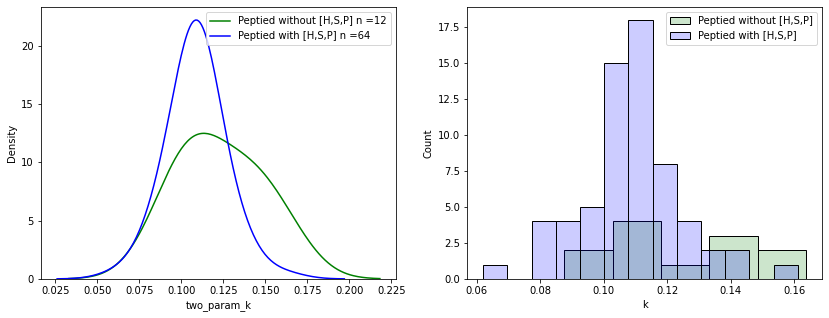

AL1L1_MOUSE
mode -without S, P, H [0.17659]
mode -with S, P, H [0.09282]


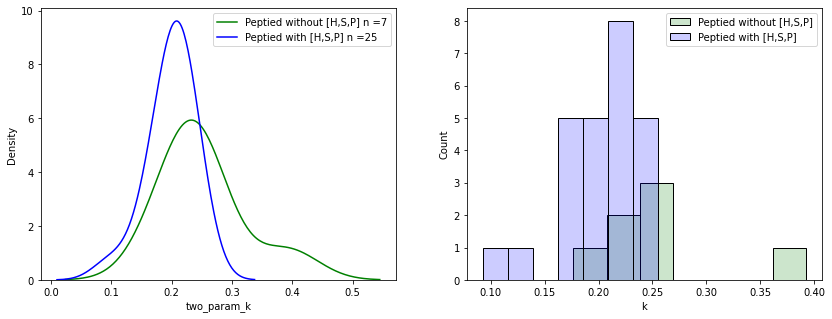

FAS_MOUSE
mode -without S, P, H [0.23699]
mode -with S, P, H [0.1726]


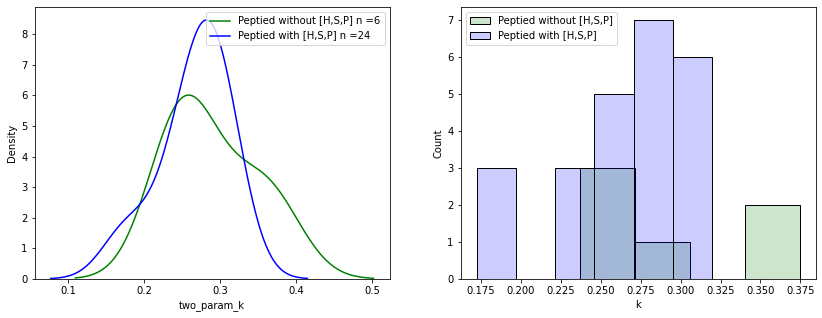

SARDH_MOUSE
mode -without S, P, H [0.09998]
mode -with S, P, H [0.09119]


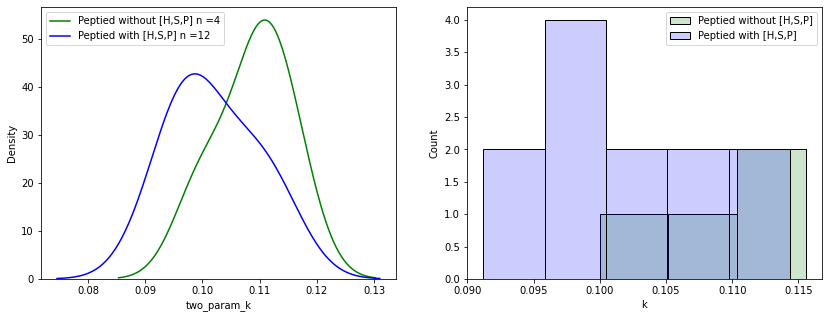

PYC_MOUSE
mode -without S, P, H [0.10426]
mode -with S, P, H [0.08706]


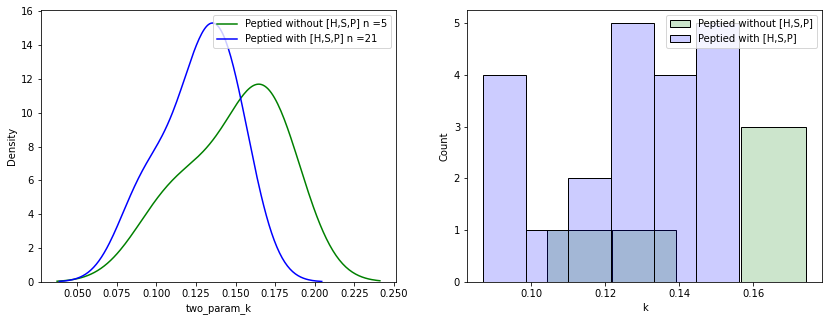

DHE3_MOUSE
mode -without S, P, H [0.09116]
mode -with S, P, H [0.04427]


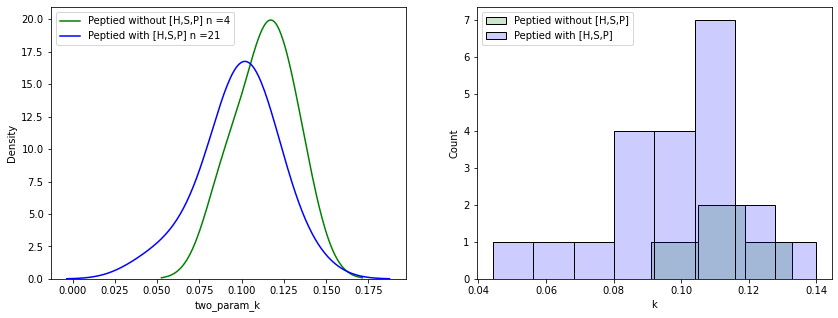

HYES_MOUSE
mode -without S, P, H [0.26876]
mode -with S, P, H [0.08453]


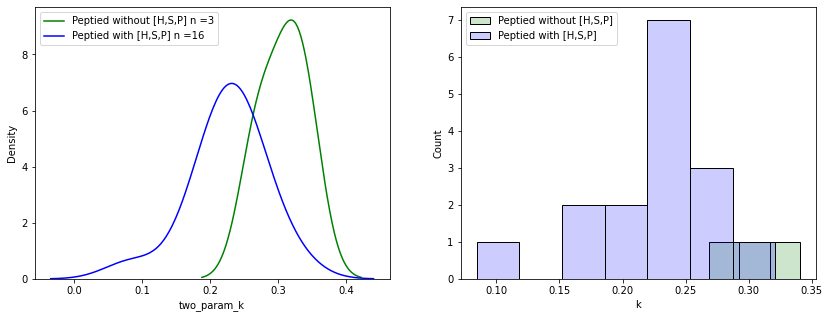

ATPB_MOUSE
mode -without S, P, H [0.09166]
mode -with S, P, H [0.07844]


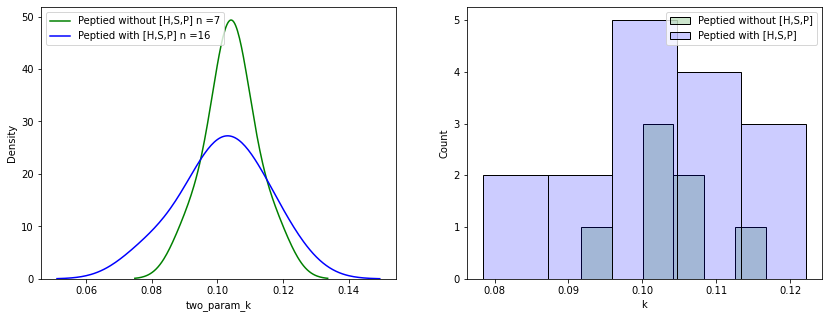

HMCS2_MOUSE
mode -without S, P, H [0.2183]
mode -with S, P, H [0.15165]


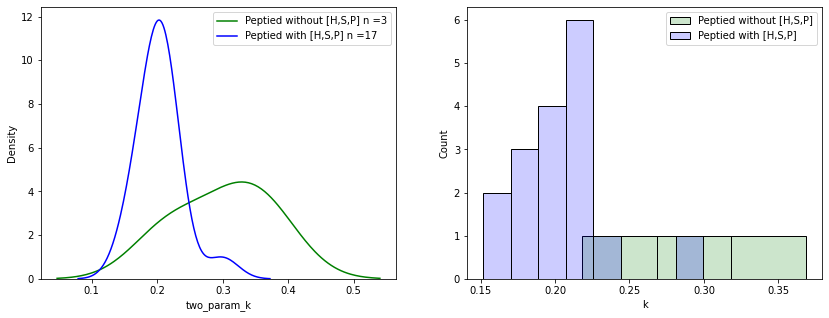

ASSY_MOUSE
mode -without S, P, H [0.16175]
mode -with S, P, H [0.0867]


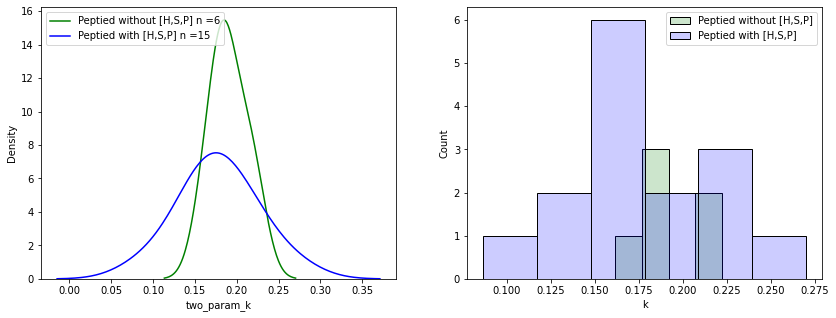

ECHA_MOUSE
mode -without S, P, H [0.12667]
mode -with S, P, H [0.07616]


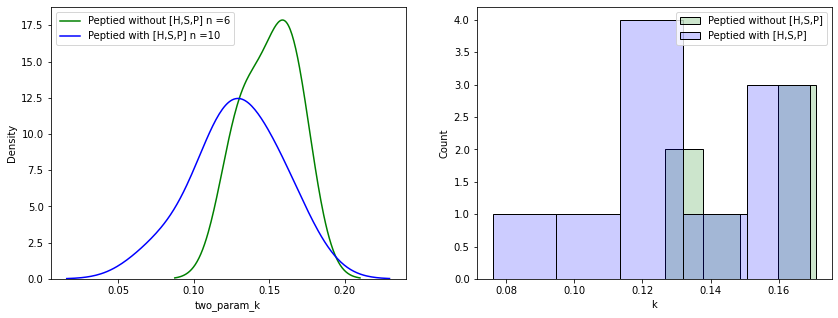

ATPA_MOUSE
mode -without S, P, H [0.11379]
mode -with S, P, H [0.06148]


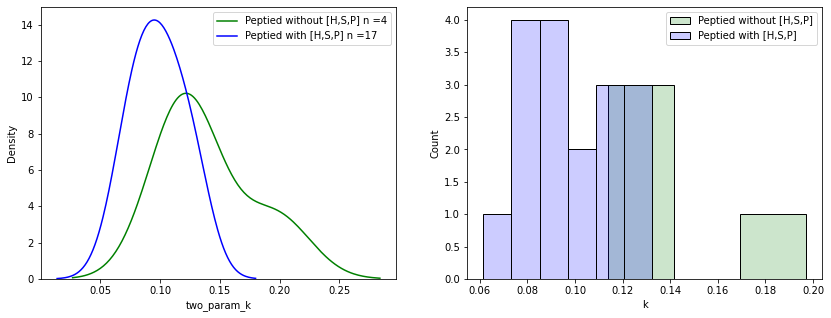

CH60_MOUSE
mode -without S, P, H [0.08623]
mode -with S, P, H [0.06446]


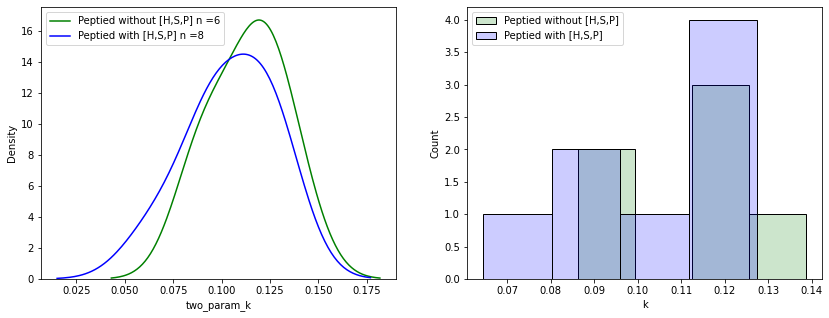

PYGL_MOUSE
mode -without S, P, H [0.11022]
mode -with S, P, H [0.07814]


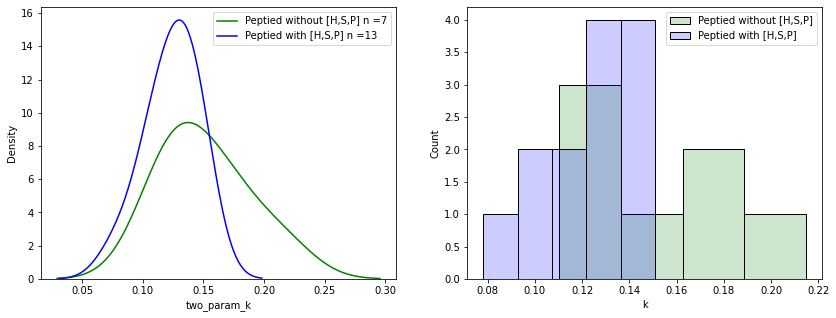

EF2_MOUSE
mode -without S, P, H [0.22396]
mode -with S, P, H [0.1601]


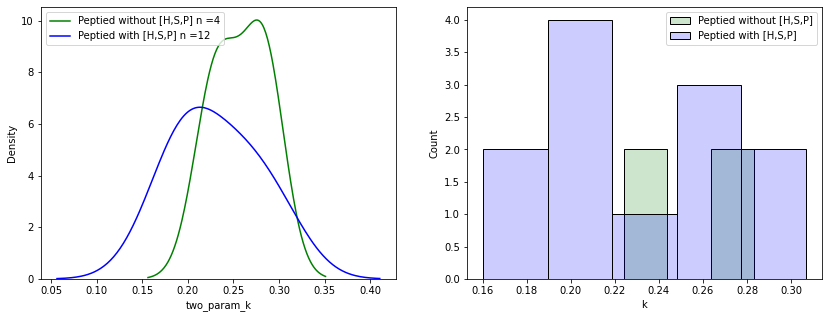

CAH3_MOUSE
mode -without S, P, H [0.17085]
mode -with S, P, H [0.10146]


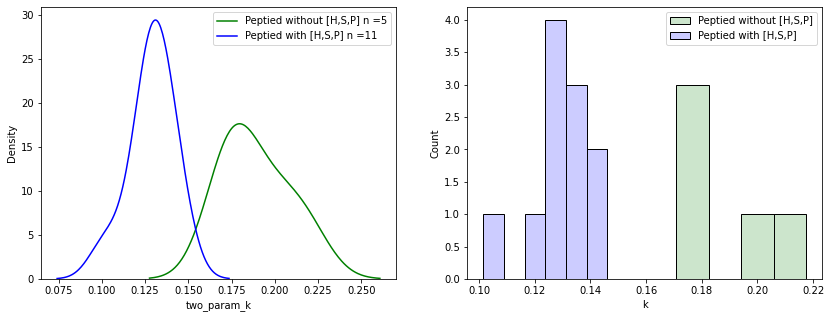

BHMT1_MOUSE
mode -without S, P, H [0.18582]
mode -with S, P, H [0.13884]


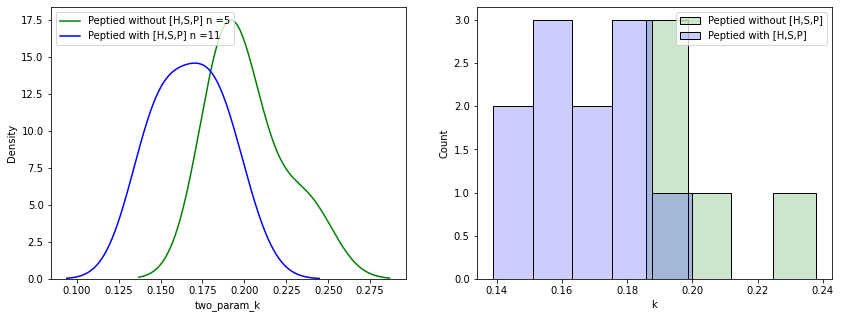

ADH1_MOUSE
mode -without S, P, H [0.10576]
mode -with S, P, H [0.09629]


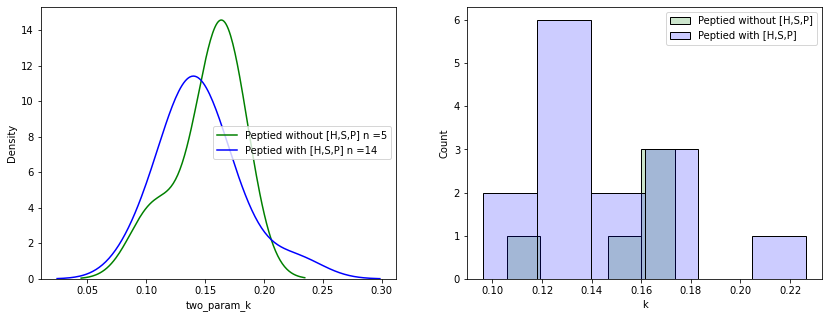

SAHH_MOUSE
mode -without S, P, H [0.17173]
mode -with S, P, H [0.15598]


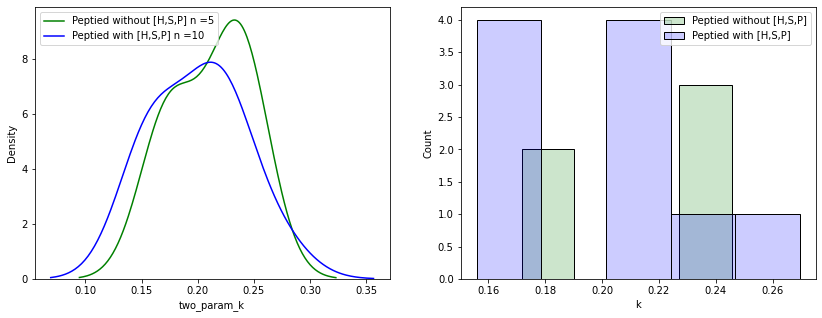

ALDH2_MOUSE
mode -without S, P, H [0.21903]
mode -with S, P, H [0.16448]


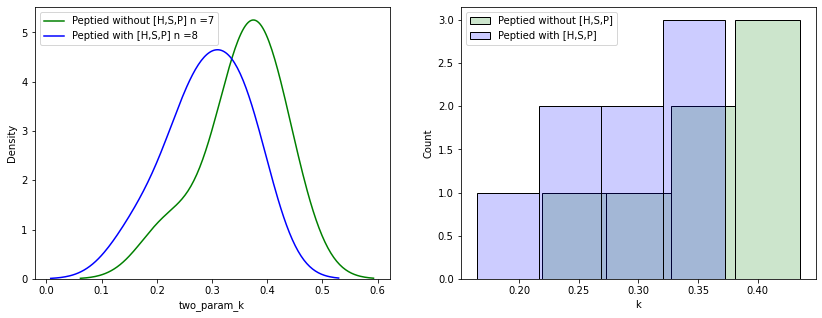

ARGI1_MOUSE
mode -without S, P, H [0.17159]
mode -with S, P, H [0.11078]


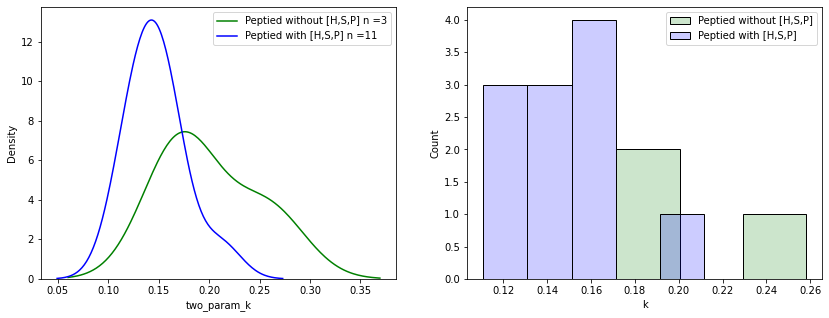

In [5]:
for prot_name in selected_prot:
# prot_name='CPSM_MOUSE'

    temp_data=data[data.Protein==prot_name]
    temp_data=temp_data[temp_data.APE_RMSE<0.01]
    
    normal=[x for x in temp_data.Peptide if  'S' not in x and 'P' not in x and 'H' not in x ]
    under_estimate=[x for x in temp_data.Peptide if  ('S' in x or 'P' in x or 'H' in x) ]

    temp_data_normal=temp_data.query(f'Peptide in {normal}')
    temp_data_under_estimate=temp_data.query(f'Peptide in {under_estimate}')
    
    if temp_data_normal.shape[0]<2 or temp_data_under_estimate.shape[0]<2:
        continue

    print(prot_name)
    print("mode -without S, P, H",list(st.mode(temp_data_normal.two_param_k)[0]))
    print("mode -with S, P, H",list(st.mode(temp_data_under_estimate.two_param_k)[0]))
    
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,3,1)
#     plt.scatter(temp_data_normal.T_NEH ,temp_data_normal.APE_NEH,c='g',alpha=0.8,label='Peptied without [H,S,P]')
#     plt.plot(range(1,max(temp_data.T_NEH)) , range(1,max(temp_data.T_NEH)) ,ls=':' ,c='r')
#     plt.xlabel('true NEH')
#     plt.ylabel('estimated NEH')
#     plt.legend()

#     plt.subplot(1,3,2)
#     plt.scatter(temp_data_under_estimate.T_NEH, temp_data_under_estimate.APE_NEH,c='b',alpha=0.5,label='Peptied with [H,S,P]')
#     plt.plot(range(1,max(temp_data.T_NEH)) , range(1,max(temp_data.T_NEH)) ,ls=':' ,c='r')
#     plt.xlabel('true NEH')
#     plt.ylabel('estimated NEH')
#     plt.legend()

#     plt.subplot(1,3,3)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.kdeplot(temp_data_normal.two_param_k,color='green',label=f'Peptied without [H,S,P] n ={temp_data_normal.shape[0]}',bw=0.75)
    sns.kdeplot(temp_data_under_estimate.two_param_k,color='blue',label=f'Peptied with [H,S,P] n ={temp_data_under_estimate.shape[0]}',bw=0.75)
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.histplot(temp_data_normal.two_param_k,color='green',label='Peptied without [H,S,P]',kde=False,alpha=0.2)
    sns.histplot(temp_data_under_estimate.two_param_k,color='blue',label='Peptied with [H,S,P]',kde=False,alpha=0.2)
    plt.xlabel('k')
    plt.legend()

    plt.show()

